In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split

import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [2]:
from glob import glob
import cv2


trn1='D:/data/invasive-aquatic-species-data/noninvasive/*/'
trn2='D:/data/Veligers/To Baylor 2023-01-30/To Baylor 2023-01-30/Ostracod Image1/*/'
trn3='D:/data/invasive-aquatic-species-data/invasive/*/'

tr1= glob(trn1)
tr2= glob(trn2)
tr3= glob(trn3)

trn11='D:/data/Veligers/To Baylor 2023-01-30/To Baylor 2023-01-30/Not Veligers/*/'
trn33='D:/data/Veligers/To Baylor 2023-01-30/To Baylor 2023-01-30/Zebra Pediveliger Image1a/*/'
tr11= glob(trn11)
tr33= glob(trn33)
tr1.extend(tr11)
tr3.extend(tr33)


trn111='D:/data/Ostracod/Ostracods Day 2 Image1 To Baylor/Ostracods Day 2 Image1 To Baylor/Sorted Images/Not/*/'

trn333='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/Veligers/Images_001/*/'
tr111= glob(trn111)
tr333= glob(trn333)
tr1.extend(tr111)
tr3.extend(tr333)

trn11='D:/data/Ostracod/Preserved Ostracods 1 To Baylor/Preserved Ostracods 1 To Baylor/Sorted Images/Not/*/'
trn33='D:/data/Veligers/Preserved Zebra Ped 1 To Baylor/Preserved Zebra Ped 1 To Baylor/Sorted Images/Pedi-Zebra Veligers/*/'
tr11= glob(trn11)
tr33= glob(trn33)
tr1.extend(tr11)
tr3.extend(tr33)


trn111='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/NonVeligers/Images_001/*/'
trn333='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/Veligers/Images_001/*/'
tr111= glob(trn111)
tr333= glob(trn333)
tr1.extend(tr111)
tr3.extend(tr333)

trn11='D:/data/Veligers/Preserved Zebra Ped 1a To Baylor/Preserved Zebra Ped 1a To Baylor/Sorted Images/Not/*/'
trn33='D:/data/Veligers/Preserved Zebra Ped 1a To Baylor/Preserved Zebra Ped 1a To Baylor/Sorted Images/Preserved Zebra Ped 1a/*/'
tr11= glob(trn11)
tr33= glob(trn33)
tr1.extend(tr11)
tr3.extend(tr33)


trn111='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/NonVeligers/Images_001/*/'
trn333='D:/data/Veligers/Baylor 2022-03-21/Baylor 2022-03-21/Davis Dam 2019-07-24/Manually Reviewed/Veligers/Images_001/*/'
tr111= glob(trn111)
tr333= glob(trn333)
tr1.extend(tr111)
tr3.extend(tr333)

trnl1='D:/data/Ostracod/Ostracod Day 2 Image12 Short To Baylor/Ostracod Day 2 Image12 To Baylor/Sorted Images/Ostracods/*/'
trnl2='D:/data/Ostracod/Ostracods Day 2 Image1 To Baylor/Ostracods Day 2 Image1 To Baylor/Sorted Images/Ostracods/*/'
trnl3='D:/data/Ostracod/Ostracods Day 2 Image2 To Baylor/Ostracods Day 2 Image2 To Baylor/Sorted Images/Ostracods/*/'
trnl4='D:/data/Ostracod/Ostracods Day 2 Image3 To Baylor/Ostracods Day 2 Image3 To Baylor/Sorted Images/Ostracods/*/'
trnl5='D:/data/Ostracod/Ostracods Day 2 Image12 To Baylor/Ostracods Day 2 Image12 To Baylor/Sorted Images/Ostracods/*/'
trnl6='D:/data/Ostracod/Preserved Ostracods 1 To Baylor/Preserved Ostracods 1 To Baylor/Sorted Images/Preserve Ostracods/*/'
trnl7='D:/data/Ostracod/Preserved Ostracods 1a To Baylor/Preserved Ostracods 1a To Baylor/Sorted Images/Preserved Ostracods 1a/*/'

trl1= glob(trnl1)
trl2= glob(trnl2)
trl3= glob(trnl3)
trl4= glob(trnl4)
trl5= glob(trnl5)
trl6= glob(trnl6)
trl7= glob(trnl7)


tr2.extend(trl1)
tr2.extend(trl2)
tr2.extend(trl3)
tr2.extend(trl4)
tr2.extend(trl5)
tr2.extend(trl6)
tr2.extend(trl7)

In [3]:
from glob import glob
from sklearn.utils import shuffle

tr1= shuffle(tr1)
tr2= shuffle(tr2)
tr3= shuffle(tr3)

tran_index_noninv = np.round( len(tr1)* .7  )
tran_index_osc = np.round( len(tr2)* .7  )
tran_index_inv = np.round( len(tr3)* .7  )
tran_index_noninv

3425.0

In [4]:
data = []
label = []
breath = []
total = 0

for j in tr3[:(int) (tran_index_inv)]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr1[:(int) (tran_index_noninv)]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)
    
for j in tr2[:(int) (tran_index_osc)]:
    label.append(2)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)

for j in range(0,len(tr3[:(int) (tran_index_inv)])):
    a = glob(tr3[j]+'/*')
    for k in range(0,5):
        data.append(a[k])

for j in range(0,len(tr1[:(int) (tran_index_noninv)])):
    a = glob(tr1[j]+'/*')
    for k in range(0,5):
        data.append(a[k])        

for j in range(0,len(tr2[:(int) (tran_index_osc)])):
    a = glob(tr2[j]+'/*')
    for k in range(0,5):
        data.append(a[k]) 

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = tf.image.resize_with_crop_or_pad(tf.keras.preprocessing.image.img_to_array(a), 28, 28)
    c = np.array(b)
    imgdata.append(c.reshape(28,28,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_train = idata
X_train = X_train.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train),28,28,3))


In [5]:
end= 0
train_df= []
breath = 5

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*5+k)
        
        deff.append(X_train[index])
        
    train_df.append(deff)

Y_train = to_categorical(label)
train_df = np.array(train_df)
YY_Train = label
np.shape(train_df)

(4395, 5, 28, 28, 3)

In [20]:
len(X_train)

5370

In [6]:
data = []
label = []
breath = []
total = 0

for j in tr3[(int) (tran_index_inv) + 1 :]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr1[ (int)(tran_index_noninv) + 1:]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)

for j in tr2[ (int)(tran_index_osc) + 1:]:
    label.append(2)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)
    
for j in range(0,len(tr3[(int) (tran_index_inv) + 1 :])):
    a = glob(tr3[j]+'/*')
    for k in range(0,5):
        data.append(a[k])

for j in range(0,len(tr1[ (int)(tran_index_noninv) + 1:])):
    a = glob(tr1[j]+'/*')
    for k in range(0,5):
        data.append(a[k])  
        
for j in range(0,len(tr2[ (int)(tran_index_osc) + 1:])):
    a = glob(tr2[j]+'/*')
    for k in range(0,5):
        data.append(a[k])  
        

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = tf.image.resize_with_crop_or_pad(tf.keras.preprocessing.image.img_to_array(a), 28, 28)
    c = np.array(b)
    imgdata.append(c.reshape(28,28,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),28,28,3))



In [7]:
end= 0
test_df= []
breath = 5

i = 0
for i in range(0, len(label)):
    deff = []
    for k in range(0, (breath)):
        
        index = (i*5 + k)
        
        deff.append(X_test[index])
        
    test_df.append(deff)
    
Y_test = to_categorical(label)
test_df = np.array(test_df)
YY_Test = label
np.shape(test_df)

(1881, 5, 28, 28, 3)

In [23]:
np.shape(train_df)

(520, 5, 28, 28, 3)

In [8]:
DATASET_NAME = "organmnist3d"
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = ( 5, 28, 28, 3 )
NUM_CLASSES = 2

# OPTIMIZER
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5

# TRAINING
EPOCHS = 60

# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

# ViViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 32
NUM_HEADS = 2
NUM_LAYERS = 2

(6123, 2)

In [9]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                layers.Dense(projection_dim)
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [10]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

inputs = layers.Input(shape= (6,2352) )

encoded_patches = (PatchEncoder(6, 32 )) (inputs)

for _ in range(6):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=6, key_dim=32, dropout=0.1 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 2352)]    0           []                               
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 6, 32)        75488       ['input_1[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 6, 32)       64          ['patch_encoder[0][0]']          
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 6, 32)       25184       ['layer_normalization[0][0]',

In [9]:
tra_df = train_df.reshape( train_df.shape[0] , train_df.shape[1],( train_df.shape[2] * train_df.shape[3] * 3)  )
#tt_df = test_df.reshape(test_df.shape[0] ,test_df.shape[1],( test_df.shape[2] * test_df.shape[3] * 3)  )

In [27]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(tra_df,Y_train,validation_split=0.2,batch_size=32,epochs=5)

Epoch 1/5


UnknownError:    Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[model/lstm/PartitionedCall]] [Op:__inference_train_function_84197]

Function call stack:
train_function -> train_function -> train_function


In [39]:
Y_test = Y_test
pred = model.predict(tt_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

array([[1103,    0],
       [   6,  201]], dtype=int64)

In [40]:
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r =  (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

0.9852941176470589 0.9972801450589301 0.9710144927536232


In [17]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

inputs = layers.Input(shape= (6,2352) )

encoded_patches = (PatchEncoder(6, 32 )) (inputs)

for _ in range(2):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=2, key_dim=32, dropout=0.1 )  (x1, x1)
    
    #lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(tra_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 2352)]    0           []                               
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 6, 32)        75488       ['input_1[0][0]']                
                                                                                                  
 layer_normalization (LayerNorm  (None, 6, 32)       64          ['patch_encoder[0][0]']          
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 6, 32)       8416        ['layer_normalization[0][0]',

NameError: name 'tra_df' is not defined

In [45]:
Y_test = Y_test
pred = model.predict(tt_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r =  (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

0.995049504950495 0.999096657633243 0.9901477832512315


In [32]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
from keras_self_attention import SeqSelfAttention

inputs = layers.Input(shape= (6,2352) )

encoded_patches = (PatchEncoder(6, 32 )) (inputs)

for _ in range(12):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output =layers.MultiHeadAttention (  num_heads=12, key_dim=32, dropout=0.1 )  (x1, x1)
    
    #lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(tra_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 6, 2352)]    0                                            
__________________________________________________________________________________________________
patch_encoder_2 (PatchEncoder)  (None, 6, 32)        75488       input_3[0][0]                    
__________________________________________________________________________________________________
layer_normalization_10 (LayerNo (None, 6, 32)        64          patch_encoder_2[0][0]            
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 6, 32)        50336       layer_normalization_10[0][0]     
                                                                 layer_normalization_10[0][0

77/77 [==============================] - 23s 103ms/step - loss: 0.5219 - accuracy: 0.7946 - val_loss: 0.2336 - val_accuracy: 1.0000
Epoch 2/100
77/77 [==============================] - 6s 82ms/step - loss: 0.3663 - accuracy: 0.8432 - val_loss: 0.4138 - val_accuracy: 0.8206
Epoch 3/100
77/77 [==============================] - 6s 79ms/step - loss: 0.2030 - accuracy: 0.9151 - val_loss: 0.2323 - val_accuracy: 0.8842
Epoch 4/100
77/77 [==============================] - 6s 76ms/step - loss: 0.1755 - accuracy: 0.9294 - val_loss: 0.2131 - val_accuracy: 0.9086
Epoch 5/100
77/77 [==============================] - 6s 73ms/step - loss: 0.1551 - accuracy: 0.9326 - val_loss: 0.1142 - val_accuracy: 0.9494
Epoch 6/100
77/77 [==============================] - 6s 73ms/step - loss: 0.1516 - accuracy: 0.9347 - val_loss: 0.0847 - val_accuracy: 0.9625
Epoch 7/100
77/77 [==============================] - 6s 73ms/step - loss: 0.1491 - accuracy: 0.9379 - val_loss: 0.1124 - val_accuracy: 0.9494
Epoch 8/100
77/7

In [34]:
Y_test = Y_test
pred = model.predict(tt_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r =  (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

0.9824561403508771 0.9863415555924266 0.98989898989899


In [11]:
#Patch Encoder with Conv2D ,  LSTM , Pos_Emd

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super(PatchEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(2, (3, 3), strides=(1,1),activation='relu')),
                TimeDistributed(MaxPooling2D(2,2)),
                TimeDistributed(Flatten()),
                layers.Dense(projection_dim)
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        
    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "projection_dim": self.projection_dim,
        })
        return config

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [12]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

inputs = layers.Input(shape= (5,28,28,3) )

encoded_patches = (PatchEncoder(5, 32 )) (inputs)

for _ in range(6):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output= layers.MultiHeadAttention (  num_heads=6, key_dim=32, dropout=0.1 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=3, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 5, 28, 28,   0           []                               
                                3)]                                                               
                                                                                                  
 patch_encoder_1 (PatchEncoder)  (None, 5, 32)       11064       ['input_2[0][0]']                
                                                                                                  
 layer_normalization_13 (LayerN  (None, 5, 32)       64          ['patch_encoder_1[0][0]']        
 ormalization)                                                                                    
                                                                                            

In [13]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Epoch 1/100
110/110 [==============================] - 25s 75ms/step - loss: 0.5418 - accuracy: 0.7472 - val_loss: 0.8969 - val_accuracy: 0.7258
Epoch 2/100
110/110 [==============================] - 5s 45ms/step - loss: 0.4166 - accuracy: 0.7984 - val_loss: 0.7927 - val_accuracy: 0.8339
Epoch 3/100
110/110 [==============================] - 5s 45ms/step - loss: 0.3280 - accuracy: 0.8535 - val_loss: 0.8789 - val_accuracy: 0.7907
Epoch 4/100
110/110 [==============================] - 5s 45ms/step - loss: 0.2987 - accuracy: 0.8669 - val_loss: 0.8061 - val_accuracy: 0.8385
Epoch 5/100
110/110 [==============================] - 5s 46ms/step - loss: 0.2640 - accuracy: 0.8854 - val_loss: 0.7503 - val_accuracy: 0.8544
Epoch 6/100
110/110 [==============================] - 5s 45ms/step - loss: 0.2242 - accuracy: 0.9056 - val_loss: 0.7288 - val_accuracy: 0.8737
Epoch 7/100
110/110 [==============================] - 8s 74ms/step - loss: 0.2210 - accuracy: 0.9121 - val_loss: 0.7686 - val_accuracy

110/110 [==============================] - 9s 83ms/step - loss: 0.0232 - accuracy: 0.9929 - val_loss: 1.3230 - val_accuracy: 0.8385
Epoch 58/100
110/110 [==============================] - 9s 77ms/step - loss: 0.0308 - accuracy: 0.9866 - val_loss: 1.1083 - val_accuracy: 0.8851
Epoch 59/100
110/110 [==============================] - 9s 81ms/step - loss: 0.0188 - accuracy: 0.9926 - val_loss: 1.1682 - val_accuracy: 0.8714
Epoch 60/100
110/110 [==============================] - 8s 75ms/step - loss: 0.0117 - accuracy: 0.9952 - val_loss: 1.2693 - val_accuracy: 0.8464
Epoch 61/100
110/110 [==============================] - 8s 74ms/step - loss: 0.0280 - accuracy: 0.9906 - val_loss: 1.1822 - val_accuracy: 0.8658
Epoch 62/100
110/110 [==============================] - 8s 76ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 1.2837 - val_accuracy: 0.8555
Epoch 63/100
110/110 [==============================] - 9s 78ms/step - loss: 0.0281 - accuracy: 0.9906 - val_loss: 1.2727 - val_accuracy: 0.844

In [46]:
Y_test = np.argmax(Y_test, axis=1)

In [47]:
Y_test = Y_test

pred = model.predict(test_df)
p = np.round(pred)
p = np.argmax(p, axis=1)

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, p)
print("Accuracy: {:.2f}%".format(accuracy * 100))


from sklearn.metrics import f1_score

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test, p, labels=[1], average='macro')
print("F1 score for class 1: {:.2f}%".format(f1_class1 * 100))



Accuracy: 99.38%
F1 score for class 1: 97.32%


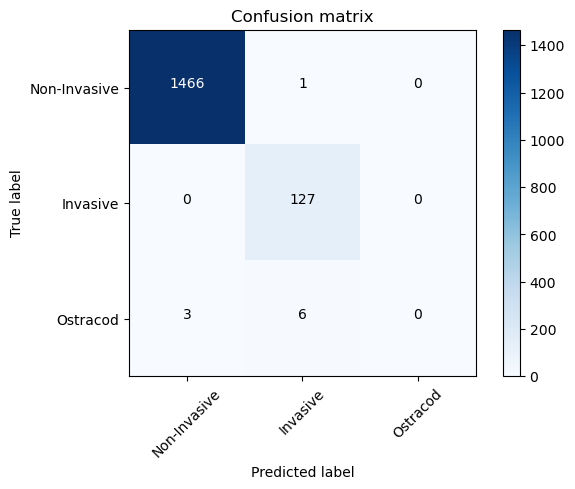

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

# Define the class names
classes = ['Non-Invasive', 'Invasive', 'Ostracod']

# Compute the confusion matrix
cm = confusion_matrix(Y_test, p)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
normalize = False
if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the confusion matrix values
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [49]:
from tensorflow.keras.models import load_model

model.save('five_frame_model.h5')


C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


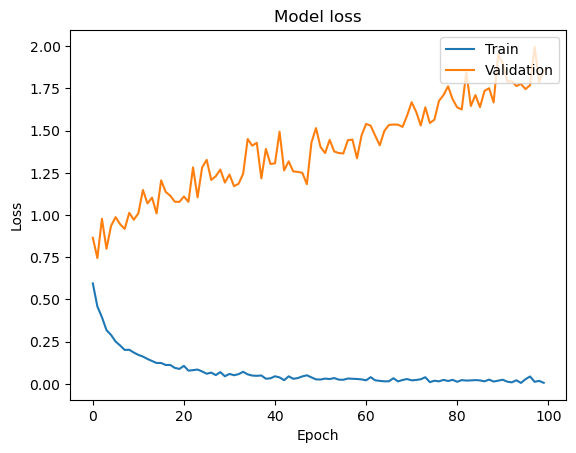

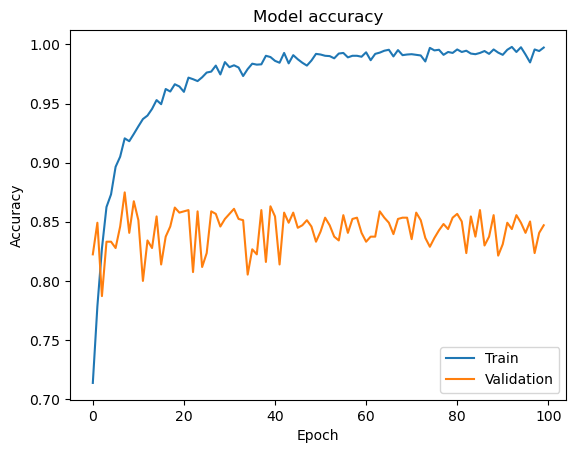

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [89]:
X_train, X_val, y_train, y_val = train_test_split( train_df,YY_Train , test_size=0.2, random_state=42)

In [90]:

@tf.function
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    """Preprocess the frames tensors and parse the labels."""
    # Preprocess images
    frames = tf.image.convert_image_dtype(
        frames[
            ..., tf.newaxis
        ],  # The new axis is to help for further processing with Conv3D layers
        tf.float32,
    )
    # Parse label
    label = tf.cast(label, tf.float32)
    return frames, label


def prepare_dataloader(
    videos: np.ndarray,
    labels: np.ndarray,
    loader_type: str = "train",
    batch_size: int = BATCH_SIZE,
):
    """Utility function to prepare the dataloader."""
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))

    if loader_type == "train":
        dataset = dataset.shuffle(BATCH_SIZE * 2)

    dataloader = (
        dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
        .batch(batch_size)
        .prefetch(tf.data.AUTOTUNE)
    )
    return dataloader


trainloader = prepare_dataloader(X_train , y_train , "train")
validloader = prepare_dataloader(X_val, y_val, "valid")
testloader = prepare_dataloader(test_df,YY_Test, "test")

In [97]:

class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=patch_size,
            padding="VALID",
        )
        self.flatten = layers.Reshape(target_shape=(-1, embed_dim))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches


In [98]:

class PositionalEncoder(layers.Layer):
    def __init__(self, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim

    def build(self, input_shape):
        _, num_tokens, _ = input_shape
        self.position_embedding = layers.Embedding(
            input_dim=num_tokens, output_dim=self.embed_dim
        )
        self.positions = tf.range(start=0, limit=num_tokens, delta=1)

    def call(self, encoded_tokens):
        # Encode the positions and add it to the encoded tokens
        encoded_positions = self.position_embedding(self.positions)
        encoded_tokens = encoded_tokens + encoded_positions
        return encoded_tokens


In [104]:
PROJECTION_DIM = 32
def create_vivit_classifier(
    tubelet_embedder,
    positional_encoder,
    input_shape=INPUT_SHAPE,
    transformer_layers=NUM_LAYERS,
    num_heads=NUM_HEADS,
    embed_dim=PROJECTION_DIM,
    layer_norm_eps=LAYER_NORM_EPS,
    num_classes=NUM_CLASSES,
):
    # Get the input layer
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = tubelet_embedder(inputs)
    # Encode patches.
    encoded_patches = positional_encoder(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization and MHSA
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=0.1
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = keras.Sequential(
            [
                layers.Dense(units=embed_dim * 4, activation=tf.nn.gelu),
                layers.Dense(units=embed_dim, activation=tf.nn.gelu),
            ]
        )(x3)

        # Skip connection
        encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
    representation = layers.LayerNormalization(epsilon=layer_norm_eps)(encoded_patches)
    representation = layers.GlobalAvgPool1D()(representation)

    # Classify outputs.
    outputs = layers.Dense(units=3, activation="softmax")(representation)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [105]:


# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

NUM_HEADS = 6
NUM_LAYERS = 6
# TRAINING
EPOCHS = 50
PROJECTION_DIM = 32

md = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

md.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 5, 28, 28,   0           []                               
                                3)]                                                               
                                                                                                  
 tubelet_embedding_5 (TubeletEm  (None, 9, 32)       24608       ['input_10[0][0]']               
 bedding)                                                                                         
                                                                                                  
 positional_encoder_5 (Position  (None, 9, 32)       288         ['tubelet_embedding_5[0][0]']    
 alEncoder)                                                                                 

In [106]:
PROJECTION_DIM = 32
def run_experiment():
    # Initialize model
    model = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

    # Compile the model with the optimizer, loss function
    # and the metrics.
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    # Train the model.
    _ = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)

    _, accuracy, top_5_accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return model


model = run_experiment()

Epoch 1/50
108/108 [==============================] - 13s 56ms/step - loss: 0.5367 - accuracy: 0.7845 - top-5-accuracy: 1.0000 - val_loss: 0.5002 - val_accuracy: 0.7879 - val_top-5-accuracy: 1.0000
Epoch 2/50
108/108 [==============================] - 5s 48ms/step - loss: 0.4612 - accuracy: 0.8008 - top-5-accuracy: 1.0000 - val_loss: 0.4707 - val_accuracy: 0.7960 - val_top-5-accuracy: 1.0000
Epoch 3/50
108/108 [==============================] - 5s 47ms/step - loss: 0.4161 - accuracy: 0.8075 - top-5-accuracy: 1.0000 - val_loss: 0.4108 - val_accuracy: 0.8193 - val_top-5-accuracy: 1.0000
Epoch 4/50
108/108 [==============================] - 5s 48ms/step - loss: 0.3934 - accuracy: 0.8198 - top-5-accuracy: 1.0000 - val_loss: 0.4090 - val_accuracy: 0.8252 - val_top-5-accuracy: 1.0000
Epoch 5/50
108/108 [==============================] - 5s 47ms/step - loss: 0.3567 - accuracy: 0.8358 - top-5-accuracy: 1.0000 - val_loss: 0.3778 - val_accuracy: 0.8368 - val_top-5-accuracy: 1.0000
Epoch 6/50
108

In [108]:
#Y_test = np.argmax(YY_test, axis=1)
Y_test = Y_test

pred = model.predict(test_df)
p = np.round(pred)
p = np.argmax(p, axis=1)

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, p)
print("Accuracy: {:.2f}%".format(accuracy * 100))


from sklearn.metrics import f1_score

# Calculate F1 score for class 1
f1_class1 = f1_score(Y_test, p, labels=[1], average='macro')
print("F1 score for class 1: {:.2f}%".format(f1_class1 * 100))



Accuracy: 95.04%
Balanced accuracy: 87.63%
F1 score for class 1: 89.44%


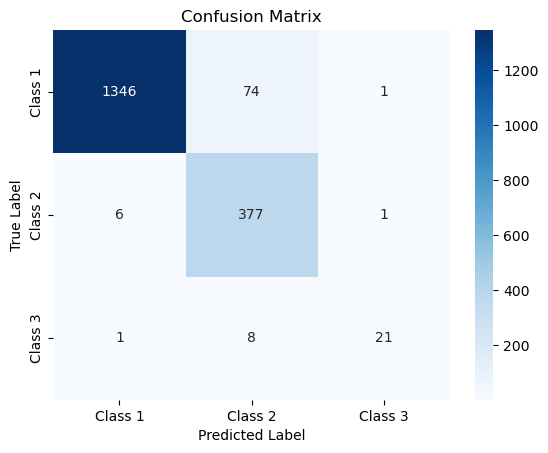

0.9398567119155354

In [14]:
tran_index_noninv

1468.0

In [12]:
len(train_df)

1905

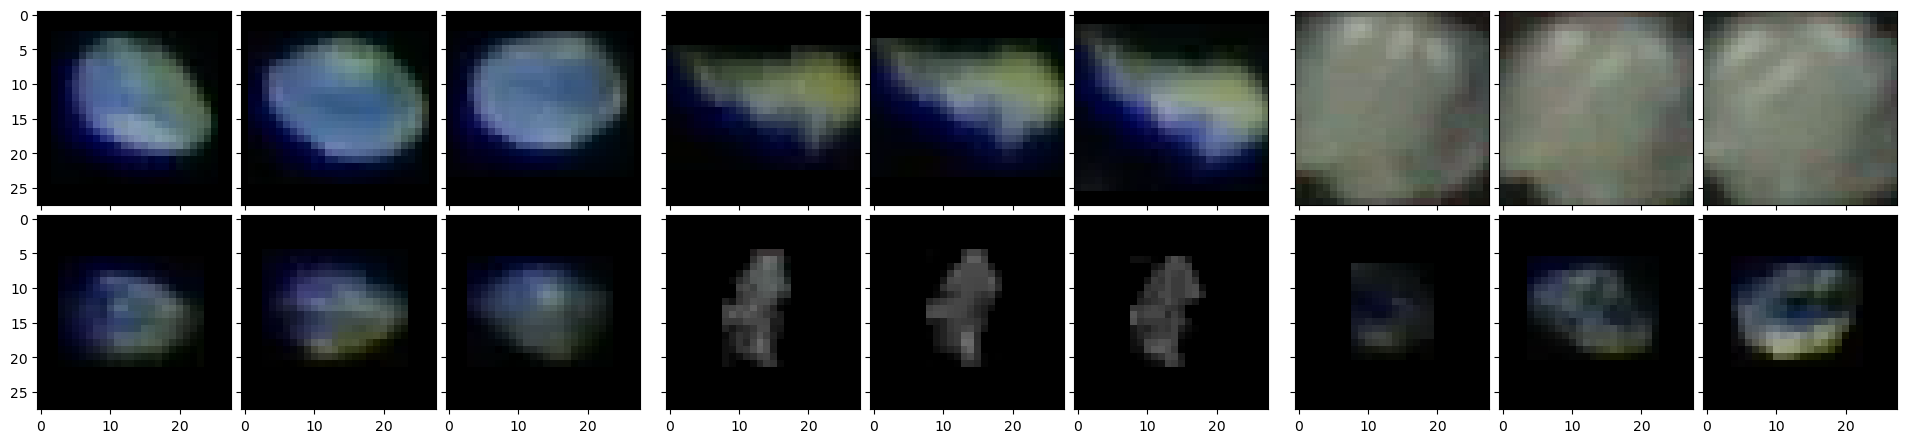

In [57]:
x = train_df[44]
y = train_df[1478]
o = train_df[1900]

x1 = train_df[55]
y1 = train_df[1470]
o1 = train_df[1792]

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(24., 8.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 11), axes_pad=0.1)

images = [x[0], x[1], x[2], None, y[0], y[1], y[2], None, o[0], o[1], o[2],
          x1[0], x1[1], x1[2], None, y1[0], y1[1], y1[2], None, o1[0], o1[1], o1[2]]

for ax, im in zip(grid, images):
    if im is not None:
        ax.imshow(im)
    else:
        ax.axis('off')
plt.show()

In [ ]:
#C3D

In [11]:
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D

In [17]:
model = Sequential()
model.add(Conv3D(64, (3, 3, 3), activation="relu",name="conv1",   input_shape=(6,28,28,3), strides=(1, 1, 1), padding="same"))  
model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), name="pool1", padding="valid"))
model.add(Conv3D(128, (3, 3, 3), activation="relu",name="conv2", strides=(1, 1, 1), padding="same"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool2", padding="valid"))
model.add(Conv3D(256, (3, 3, 3), activation="relu",name="conv3a", strides=(1, 1, 1), padding="same"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool3", padding="valid"))
model.add(Conv3D(512, (3, 3, 3), activation="relu",name="conv4a", strides=(1, 1, 1), padding="same"))   

model.add(Flatten())
                     
    # FC layers group
model.add(Dense(1024, activation='relu', name='fc6'))
model.add(Dropout(.5))
model.add(Dense(2, activation='softmax', name='fc8'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 6, 28, 28, 64)     5248      
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 6, 14, 14, 64)     0         
_________________________________________________________________
conv2 (Conv3D)               (None, 6, 14, 14, 128)    221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 3, 7, 7, 128)      0         
_________________________________________________________________
conv3a (Conv3D)              (None, 3, 7, 7, 256)      884992    
_________________________________________________________________
pool3 (MaxPooling3D)         (None, 1, 3, 3, 256)      0         
_________________________________________________________________
conv4a (Conv3D)              (None, 1, 3, 3, 512)     

In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Epoch 1/100
77/77 [==============================] - 357s 5s/step - loss: 0.3074 - accuracy: 0.8591 - val_loss: 0.1795 - val_accuracy: 0.9184
Epoch 2/100
77/77 [==============================] - 356s 5s/step - loss: 0.2036 - accuracy: 0.9224 - val_loss: 0.0635 - val_accuracy: 0.9723
Epoch 3/100
77/77 [==============================] - 338s 4s/step - loss: 0.1969 - accuracy: 0.9216 - val_loss: 0.0981 - val_accuracy: 0.9625
Epoch 4/100
77/77 [==============================] - 360s 5s/step - loss: 0.1657 - accuracy: 0.9306 - val_loss: 0.0700 - val_accuracy: 0.9674
Epoch 5/100
77/77 [==============================] - 358s 5s/step - loss: 0.1690 - accuracy: 0.9310 - val_loss: 0.0765 - val_accuracy: 0.9723
Epoch 6/100
65/77 [========================>.....] - ETA: 56s - loss: 0.1179 - accuracy: 0.9495 

KeyboardInterrupt: 

In [ ]:
Y_test = Y_test
pred = model.predict(test_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

In [ ]:
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r = 1 - (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

In [17]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models

model= models.Sequential()
model.add(TimeDistributed(Conv2D(2, (3, 3), strides=(1,1),activation='relu'),input_shape=(6, 28, 28, 3)))
model.add(TimeDistributed(MaxPooling2D(2,2)))
model.add(TimeDistributed(Conv2D(4, (3, 3), strides=(1,1),activation='relu')))
model.add(TimeDistributed(MaxPooling2D(2,2)))


model.add(TimeDistributed(Flatten()))

model.add(LSTM(8,return_sequences=False,dropout=0.2)) # used 32 units

model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_29 (TimeDis (None, 6, 26, 26, 2)      56        
_________________________________________________________________
time_distributed_30 (TimeDis (None, 6, 13, 13, 2)      0         
_________________________________________________________________
time_distributed_31 (TimeDis (None, 6, 11, 11, 4)      76        
_________________________________________________________________
time_distributed_32 (TimeDis (None, 6, 5, 5, 4)        0         
_________________________________________________________________
time_distributed_33 (TimeDis (None, 6, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 3488      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [18]:
Y_test = Y_test
pred = model.predict(test_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r =  (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

0.9253731343283582 0.9528218434864658 0.9253731343283582


In [55]:
predictions = model.predict(test_df)

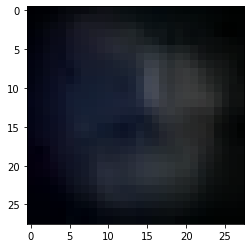

In [57]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
from keras_self_attention import SeqSelfAttention

inputs = layers.Input(shape= (6,28,28,3) )

encoded_patches = (PatchEncoder(6, 32 )) (inputs)

for _ in range(2):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=2, key_dim=32, dropout=0.1 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.1)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_df,Y_train,validation_split=0.2,batch_size=32,epochs=100)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 6, 28, 28, 3 0                                            
__________________________________________________________________________________________________
patch_encoder_5 (PatchEncoder)  (None, 6, 32)        11096       input_6[0][0]                    
__________________________________________________________________________________________________
layer_normalization_85 (LayerNo (None, 6, 32)        64          patch_encoder_5[0][0]            
__________________________________________________________________________________________________
multi_head_attention_36 (MultiH (None, 6, 32)        8416        layer_normalization_85[0][0]     
                                                                 layer_normalization_85[0][0

Epoch 23/100
77/77 [==============================] - 9s 120ms/step - loss: 0.0449 - accuracy: 0.9853 - val_loss: 0.1142 - val_accuracy: 0.9625
Epoch 24/100
77/77 [==============================] - 9s 120ms/step - loss: 0.0167 - accuracy: 0.9931 - val_loss: 0.4680 - val_accuracy: 0.9021
Epoch 25/100
77/77 [==============================] - 10s 127ms/step - loss: 0.0479 - accuracy: 0.9816 - val_loss: 0.1475 - val_accuracy: 0.9608
Epoch 26/100
77/77 [==============================] - 10s 128ms/step - loss: 0.0168 - accuracy: 0.9931 - val_loss: 0.2110 - val_accuracy: 0.9511
Epoch 27/100
77/77 [==============================] - 10s 131ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.3497 - val_accuracy: 0.9282
Epoch 28/100
77/77 [==============================] - 11s 146ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.3747 - val_accuracy: 0.9233
Epoch 29/100
77/77 [==============================] - 10s 126ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.3154 - val_accu

In [58]:
model.layers

In [ ]:
tran_index_noninv = np.round( len(tr1)* .3  )
tran_index_osc = np.round( len(tr2)* .5  )
tran_index_inv = np.round( len(tr3)* .3  )

In [52]:
len(train_df)

1905

In [33]:
Y_train[1470]

array([1., 0., 0.], dtype=float32)

In [ ]:
14

In [77]:
x = train_df[15]
x1 = train_df[27]
x2 = train_df[1470]
x3 = train_df[1472]
x4 = train_df[1769]
x5 = train_df[1739]
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(240., 40.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 12),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for ax, im in zip(grid, [  x[0],  x[1],  x[2],  x[3]
                         , x2[0], x2[1], x2[2], x2[3]
                         , x4[0], x4[1], x4[2], x4[3]
                         , x1[0], x1[1], x1[2], x1[3]
                         , x3[0], x3[1], x3[2], x3[3]
                         , x5[0], x5[1], x5[2], x5[3]     ]    ):
    ax.imshow(im)
plt.show()

In [21]:
1764

array([0., 1., 0.], dtype=float32)

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [47]:
def create_transformer_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Flatten the video frames
    flattened = layers.Reshape((-1, input_shape[-1]))(inputs)
    
    # Transformer Encoder layers
    transformer_encoder = layers.TransformerEncoder(num_layers=2, d_model=64, num_heads=4, dff=128, 
                                                    dropout=0.1, name="transformer_encoder")
    encoded = transformer_encoder(flattened)
    
    # Global average pooling
    pooled = layers.GlobalAveragePooling1D()(encoded)
    
    # Output layer
    outputs = layers.Dense(num_classes, activation="softmax")(pooled)
    
    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [48]:
import numpy as np

# Generate random data and labels
data = np.random.random((5, 28, 28, 3))
labels = np.random.randint(0, 2, (5, 3))


In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

def create_transformer_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Flatten the video frames
    flattened = layers.Reshape((-1, input_shape[-1]))(inputs)
    
    # Multi-head self-attention
    attention_output = tfa.layers.MultiHeadAttention(
        key_dim=64, num_heads=4, head_size=16, dropout=0.1
    )(flattened, flattened)
    
    # Transformer layer
    transformer_output = tfa.layers.TransformerEncoder(64, 2, 128, 0.1)(
        attention_output, training=False
    )
    
    # Global average pooling
    pooled = layers.GlobalAveragePooling1D()(transformer_output)
    
    # Output layer
    outputs = layers.Dense(num_classes, activation="softmax")(pooled)
    
    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Generate random data and labels
data = np.random.random((5, 28, 28, 3))
labels = np.random.randint(0, 2, (5, 3))

input_shape = (28, 28, 3)
num_classes = 3

model = create_transformer_model(input_shape, num_classes)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(data, labels, batch_size=1, epochs=10)

# Get the attention weights from the model
attention_layer = model.get_layer(index=2)  # Assuming it's the 3rd layer in the model
attention_weights = attention_layer.attention_weights[0]

# Plot the attention weights for each head
num_heads = attention_weights.shape[0]
fig, axs = plt.subplots(num_heads, 1, figsize=(6, 6*num_heads))

for head in range(num_heads):
    axs[head].imshow(attention_weights[head], cmap="hot", interpolation="nearest")
    axs[head].set_xlabel("Encoder Step")
    axs[head].set_ylabel("Encoder Step")
    axs[head].set_title("Head {}".format(head+1))

plt.tight_layout()
plt.show()


TypeError: ('Keyword argument not understood:', 'key_dim')